In [28]:

# Analyzing Salesforce or similar CRM data involves a range of techniques and approaches aimed at understanding customer behavior, optimizing 
# sales processes, and improving overall business performance.

# We can undertake several strategies to extract useful insights from any kind of CRM data:
# 1. Customer Segmentation
# 2. Predictive Analytics
# 3. Sales and Marketing Effectiveness
# 4. Customer Experience and Satisfaction
# 5. Operational Efficiency
# 6. Financial Performance and Forecasting



# Implementation Steps:
    
# Data Preparation: Cleanse and preprocess CRM data to ensure accuracy and consistency. This may involve handling missing values, 
# encoding categorical variables, and normalizing numerical data.

# Exploratory Data Analysis (EDA): Explore relationships between variables, visualize trends, and identify patterns using techniques 
# such as scatter plots, histograms, and correlation matrices.

# Model Building and Evaluation: Develop predictive models, clustering algorithms, or statistical analyses tailored to specific 
# business questions and objectives. Evaluate model performance using appropriate metrics (e.g., accuracy, precision, recall, RMSE, R-squared).

# Actionable Insights: Translate analytical findings into actionable insights and strategic recommendations. Collaborate with 
# cross-functional teams (sales, marketing, customer support) to implement changes and measure impact over time.

# By leveraging these types of analyses on Salesforce or CRM data, organizations can gain deeper insights into customer behavior, 
# improve operational efficiency, enhance customer satisfaction, and drive revenue growth. The specific analyses chosen should align 
# with business goals and priorities to deliver meaningful outcomes and competitive advantages.


In [61]:

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Number of records
num_records = 1000

# Generate synthetic Salesforce data (CRM data)
np.random.seed(42)  # For reproducibility

client_id = np.arange(1, num_records + 1)
age = np.random.randint(18, 70, size=num_records)
company_size = np.random.choice(['Small', 'Medium', 'Large'], size=num_records, p=[0.5, 0.3, 0.2])
industry = np.random.choice(['Tech', 'Finance', 'Retail', 'Healthcare', 'Manufacturing'], size=num_records)
annual_revenue = np.random.randint(100000, 10000000, size=num_records)
years_with_company = np.random.randint(1, 20, size=num_records)
number_of_purchases = np.random.randint(1, 100, size=num_records)
average_purchase_value = np.round(np.random.uniform(100, 10000, size=num_records), 2)
last_purchase_days_ago = np.random.randint(1, 365, size=num_records)
is_high_value_client = np.random.choice([0, 1], size=num_records, p=[0.7, 0.3])


# Brief Explanation of Features:
# client_id: Sequential numbers to uniquely identify each client.
# age: Random integer values between 18 and 70.
# company_size: Categorical feature with values 'Small', 'Medium', 'Large'.
# industry: Categorical feature with values representing different industries.
# annual_revenue: Random integer values between 100,000 and 10,000,000.
# years_with_company: Random integer values between 1 and 20.
# number_of_purchases: Random integer values between 1 and 100.
# average_purchase_value: Random float values between 100 and 10,000.
# last_purchase_days_ago: Random integer values between 1 and 365.
# is_high_value_client: Binary values (0 or 1) indicating whether the client is high value, with a probability distribution of 70% for 0 and 30% for 1.


# Create a DataFrame
data = pd.DataFrame({
    'client_id': client_id,
    'age': age,
    'company_size': company_size,
    'industry': industry,
    'annual_revenue': annual_revenue,
    'years_with_company': years_with_company,
    'number_of_purchases': number_of_purchases,
    'average_purchase_value': average_purchase_value,
    'last_purchase_days_ago': last_purchase_days_ago,
    'is_high_value_client': is_high_value_client
})

# Save the synthetic data to a CSV file...optional
# data.to_csv('synthetic_crm_data.csv', index=False)

# Display the first few rows
print(data.head())

# Create a DataFrame
data = pd.DataFrame({
    'client_id': client_id,
    'age': age,
    'company_size': company_size,
    'industry': industry,
    'annual_revenue': annual_revenue,
    'years_with_company': years_with_company,
    'number_of_purchases': number_of_purchases,
    'average_purchase_value': average_purchase_value,
    'last_purchase_days_ago': last_purchase_days_ago,
    'is_high_value_client': is_high_value_client
})

# Save the synthetic data to a CSV file...optional
# data.to_csv('synthetic_crm_data.csv', index=False)

# what does the data look like?
print(data.columns)
print(data.shape)
print(data.head())


   client_id  age company_size       industry  annual_revenue  \
0          1   56       Medium     Healthcare         6399492   
1          2   69        Small         Retail         5898946   
2          3   46        Small  Manufacturing         7336694   
3          4   32        Small     Healthcare         6028643   
4          5   60        Small     Healthcare         9824700   

   years_with_company  number_of_purchases  average_purchase_value  \
0                  13                    1                 8380.57   
1                  15                   84                 5074.41   
2                   3                   44                  242.37   
3                  11                   87                 8049.51   
4                  14                   96                 9809.86   

   last_purchase_days_ago  is_high_value_client  
0                     246                     0  
1                     297                     0  
2                     172             

In [62]:

# Let's run a Regression Experiment

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



# Create the target variable (dependent variable)
target = data['average_purchase_value']

# Select features (excluding client_id (IDs aren't useful fro making predictions) and target variable)
features = data.drop(columns=['client_id','average_purchase_value'])

# Initialize LabelEncoder
le = LabelEncoder()


# a regression model can only work with numeric data. To use non-numeric (categorical) data in regression models, you need to convert these 
# categorical variables into a numeric format. There are several ways to encode categorical data:

# Label Encoding: This assigns each unique category a different integer value. This method is suitable for ordinal categories where the order 
# of values matters.
# Label Encoding is also known as Categorical Encoding
# One-Hot Encoding: This creates a new binary column for each category. This method is suitable for nominal categories where the order of values 
# does not matter.
    
# Apply LabelEncoder to each categorical column
for column in ['age', 'company_size', 'industry', 'annual_revenue',
       'years_with_company', 'number_of_purchases', 
       'last_purchase_days_ago', 'is_high_value_client']:
    features[column] = le.fit_transform(features[column])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test_scaled)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


Mean Squared Error: 8503606.498080542
Mean Squared Error (MSE): 8503606.498080542
Root Mean Squared Error (RMSE): 2916.094391147266
Mean Absolute Error (MAE): 2480.3898945
R-squared (R²): -0.15378088579081095
Mean Absolute Percentage Error (MAPE): 179.57640435232997%


In [32]:

# Let's understand some terminology here...
# MSE (Mean Squared Error): Measures the average of the squares of the errors, giving more weight to larger errors.
# RMSE (Root Mean Squared Error): The square root of MSE, which is in the same unit as the target variable and easier to interpret.
# MAE (Mean Absolute Error): The average of absolute differences between the actual and predicted values, giving equal weight to all errors.
# R² (R-squared): Indicates how well the model fits the data, with values closer to 1 indicating a better fit.
# MAPE (Mean Absolute Percentage Error): Provides a percentage error, making it easier to interpret the magnitude of errors relative to the 
# actual values.


In [54]:

# Display a few predictions and their actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())


      Actual  Predicted
521  3989.80  4745.2367
737  3928.29  5258.3311
740  4593.87  4638.3912
660  7799.40  4742.2849
411  8669.16  3631.0671


In [63]:

# Now, we will take the trained model and make predictions one new, unseen, data

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Create the target variable 'average_purchase_value'
target = data['average_purchase_value']

# Select features (excluding client_id and target variable)
features = data[['age', 'company_size', 'industry', 'annual_revenue',
                 'years_with_company', 'number_of_purchases', 
                 'last_purchase_days_ago', 'is_high_value_client']]

# Initialize LabelEncoder for categorical features
le_company_size = LabelEncoder()
le_industry = LabelEncoder()


# Apply LabelEncoder to each categorical column
features['company_size'] = le_company_size.fit_transform(features['company_size'])
features['industry'] = le_industry.fit_transform(features['industry'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)


# Example: Predict average_purchase_value for new data
# Here is the new data entry provided:
new_data = pd.DataFrame({
    'age': [56],
    'company_size': [le_company_size.transform(['Medium'])[0]],  # Encoding new categorical data
    'industry': [le_industry.transform(['Healthcare'])[0]],      # Encoding new categorical data
    'annual_revenue': [6399492],
    'years_with_company': [13],
    'number_of_purchases': [1],
    'last_purchase_days_ago': [246],
    'is_high_value_client': [0]
})

# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Predict the average_purchase_value for the new data
predicted_value = rf_regressor.predict(new_data_scaled)
print(f'Predicted average_purchase_value for the new data: {predicted_value[0]}')


Predicted average_purchase_value for the new data: 7351.414599999994


In [56]:

# Based on these features:
# 'age': [56],
# 'company_size': [le_company_size.transform(['Medium'])[0]],  # Encoding new categorical data
# 'industry': [le_industry.transform(['Healthcare'])[0]],      # Encoding new categorical data
# 'annual_revenue': [6399492],
# 'years_with_company': [13],
# 'number_of_purchases': [1],
# 'last_purchase_days_ago': [246],
# 'is_high_value_client': [0]
    
# The 'average_purchase_value' = 7351.414599999994
# The next time we enagage a customer with this profile, we can expect the individual to spend around $7351.41


In [64]:

# Let's run a Classification Experiment

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example synthetic data (replace with your actual dataset)
data = pd.DataFrame({
    'age': np.random.randint(18, 70, size=100),
    'company_size': np.random.choice(['Small', 'Medium', 'Large'], size=100),
    'industry': np.random.choice(['Tech', 'Finance', 'Retail', 'Healthcare', 'Manufacturing'], size=100),
    'annual_revenue': np.random.randint(100000, 10000000, size=100),
    'years_with_company': np.random.randint(1, 20, size=100),
    'number_of_purchases': np.random.randint(1, 100, size=100),
    'last_purchase_days_ago': np.random.randint(1, 365, size=100),
    'is_high_value_client': np.random.choice([0, 1], size=100)
})

# Define features (X) and target (y)
features = ['age', 'company_size', 'industry', 'annual_revenue',
            'years_with_company', 'number_of_purchases', 'last_purchase_days_ago']

target = 'is_high_value_client'

X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical variables
label_encoder_company_size = LabelEncoder()
label_encoder_industry = LabelEncoder()

X_train['company_size_encoded'] = label_encoder_company_size.fit_transform(X_train['company_size'])
X_train['industry_encoded'] = label_encoder_industry.fit_transform(X_train['industry'])

# Scale numerical features
scaler = StandardScaler()
X_train_numerical = X_train[['age', 'annual_revenue', 'years_with_company',
                             'number_of_purchases', 'last_purchase_days_ago']]
X_train_numerical_scaled = scaler.fit_transform(X_train_numerical)

# Concatenate scaled numerical features with encoded categorical features
X_train_scaled = np.hstack((X_train_numerical_scaled, X_train[['company_size_encoded', 'industry_encoded']].values))


In [65]:

# Train the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Prepare new_data for prediction
new_data = pd.DataFrame({
    'age': [56],
    'company_size': ['Medium'],  # Assuming new categorical data
    'industry': ['Healthcare'],  # Assuming new categorical data
    'annual_revenue': [6399492],
    'years_with_company': [13],
    'number_of_purchases': [1],
    'last_purchase_days_ago': [246]
})

# Encode categorical variables in new_data
new_data['company_size_encoded'] = label_encoder_company_size.transform(new_data['company_size'])
new_data['industry_encoded'] = label_encoder_industry.transform(new_data['industry'])

# Scale numerical features in new_data
new_data_numerical = new_data[['age', 'annual_revenue', 'years_with_company',
                               'number_of_purchases', 'last_purchase_days_ago']]
new_data_numerical_scaled = scaler.transform(new_data_numerical)

# Concatenate scaled numerical features with encoded categorical features for prediction
new_data_scaled = np.hstack((new_data_numerical_scaled, new_data[['company_size_encoded', 'industry_encoded']].values))

# Predict the probability of being a high-value client (class 1)
predicted_proba = rf_classifier.predict_proba(new_data_scaled)[:, 1]

print(f'Predicted probability of being a high-value client: {predicted_proba[0]}')


Predicted probability of being a high-value client: 0.44


In [66]:

# We can try different classifiers and see if we can improve the learning abilities of 
# different models, as well as predictive abilities of different models

# 1 - Logistic Regression: A simple and interpretable model for binary classification.
# 2 - Support Vector Machine (SVM): Effective in high-dimensional spaces and for cases where the number of dimensions exceeds the number of samples.
# 3 - Gradient Boosting Classifier: An ensemble technique that builds models sequentially to reduce errors.
# 4 - k-Nearest Neighbors (k-NN): A non-parametric method that can be useful for classification tasks.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example synthetic data (replace with your actual dataset)
data = pd.DataFrame({
    'age': np.random.randint(18, 70, size=100),
    'company_size': np.random.choice(['Small', 'Medium', 'Large'], size=100),
    'industry': np.random.choice(['Tech', 'Finance', 'Retail', 'Healthcare', 'Manufacturing'], size=100),
    'annual_revenue': np.random.randint(100000, 10000000, size=100),
    'years_with_company': np.random.randint(1, 20, size=100),
    'number_of_purchases': np.random.randint(1, 100, size=100),
    'last_purchase_days_ago': np.random.randint(1, 365, size=100),
    'is_high_value_client': np.random.choice([0, 1], size=100)
})

# Define features (X) and target (y)
features = ['age', 'company_size', 'industry', 'annual_revenue',
            'years_with_company', 'number_of_purchases', 'last_purchase_days_ago']

target = 'is_high_value_client'

X = data[features]
y = data[target]

# Encode categorical variables
label_encoder_company_size = LabelEncoder()
label_encoder_industry = LabelEncoder()

X['company_size_encoded'] = label_encoder_company_size.fit_transform(X['company_size'])
X['industry_encoded'] = label_encoder_industry.fit_transform(X['industry'])

# Remove original categorical columns and replace with encoded columns
X = X.drop(columns=['company_size', 'industry'])
X_encoded = X[['company_size_encoded', 'industry_encoded']]

# Combine numerical and encoded categorical features
X_final = pd.concat([X.drop(columns=['company_size_encoded', 'industry_encoded']), X_encoded], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to train and evaluate a model
def evaluate_model(model, model_name):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'\n{model_name}:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')

# Define and evaluate classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
logistic_regressor = LogisticRegression(random_state=42)
svm_classifier = SVC(probability=True, random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)
knn_classifier = KNeighborsClassifier()

classifiers = [
    (rf_classifier, "Random Forest Classifier"),
    (logistic_regressor, "Logistic Regression"),
    (svm_classifier, "Support Vector Machine"),
    (gb_classifier, "Gradient Boosting Classifier"),
    (knn_classifier, "K-Nearest Neighbors")
]

for clf, name in classifiers:
    evaluate_model(clf, name)



Random Forest Classifier:
Accuracy: 0.6
Precision: 0.5
Recall: 0.375
F1 Score: 0.42857142857142855

Logistic Regression:
Accuracy: 0.75
Precision: 0.8
Recall: 0.5
F1 Score: 0.6153846153846154

Support Vector Machine:
Accuracy: 0.6
Precision: 0.5
Recall: 0.125
F1 Score: 0.2

Gradient Boosting Classifier:
Accuracy: 0.65
Precision: 0.5555555555555556
Recall: 0.625
F1 Score: 0.5882352941176471

K-Nearest Neighbors:
Accuracy: 0.55
Precision: 0.4
Recall: 0.25
F1 Score: 0.3076923076923077


In [ ]:

# What is regression for?
# This is a supervised methodology
# Continuous Target Variable: Unlike classification, which predicts discrete labels or classes, regression predicts a continuous numeric value. 
# For example, predicting house prices, stock prices, temperature, or sales revenue are all regression problems where the target variable is a 
# continuous value.

# What is classification for?
# This is a supervised methodology
# Categorical Target Variable: The target variable in classification is categorical, meaning it consists of class labels that represent different 
# categories or classes.
    

In [9]:

# What is regression for?
# This is a supervised methodology
# Continuous Target Variable: Unlike classification, which predicts discrete labels or classes, regression predicts a continuous numeric value. 
# For example, predicting house prices, stock prices, temperature, or sales revenue are all regression problems where the target variable is a 
# continuous value.

# What is classification for?
# This is a supervised methodology
# Categorical Target Variable: The target variable in classification is categorical, meaning it consists of class labels that represent different 
# categories or classes.


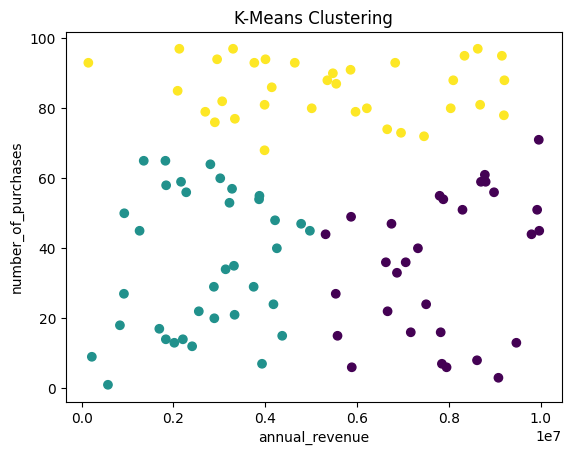

In [67]:

# Let's run a very basic Clustering Experiment
# KMeans Clustering

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data
data = data

# Data preprocessing (assuming numerical data for simplicity)
# Select relevant features
features = data[['annual_revenue','number_of_purchases']]  # Adjust based on your dataset

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-Means Clustering
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
kmeans.fit(scaled_features)

# Add cluster labels to the original data
data['cluster'] = kmeans.labels_

# Visualize the clusters (assuming 2D for simplicity)
plt.scatter(data['annual_revenue'], data['number_of_purchases'], c=data['cluster'], cmap='viridis')
plt.xlabel('annual_revenue')
plt.ylabel('number_of_purchases')
plt.title('K-Means Clustering')
plt.show()

# Save the clustered data...optional...
# data.to_csv('salesforce_data_with_clusters.csv', index=False)


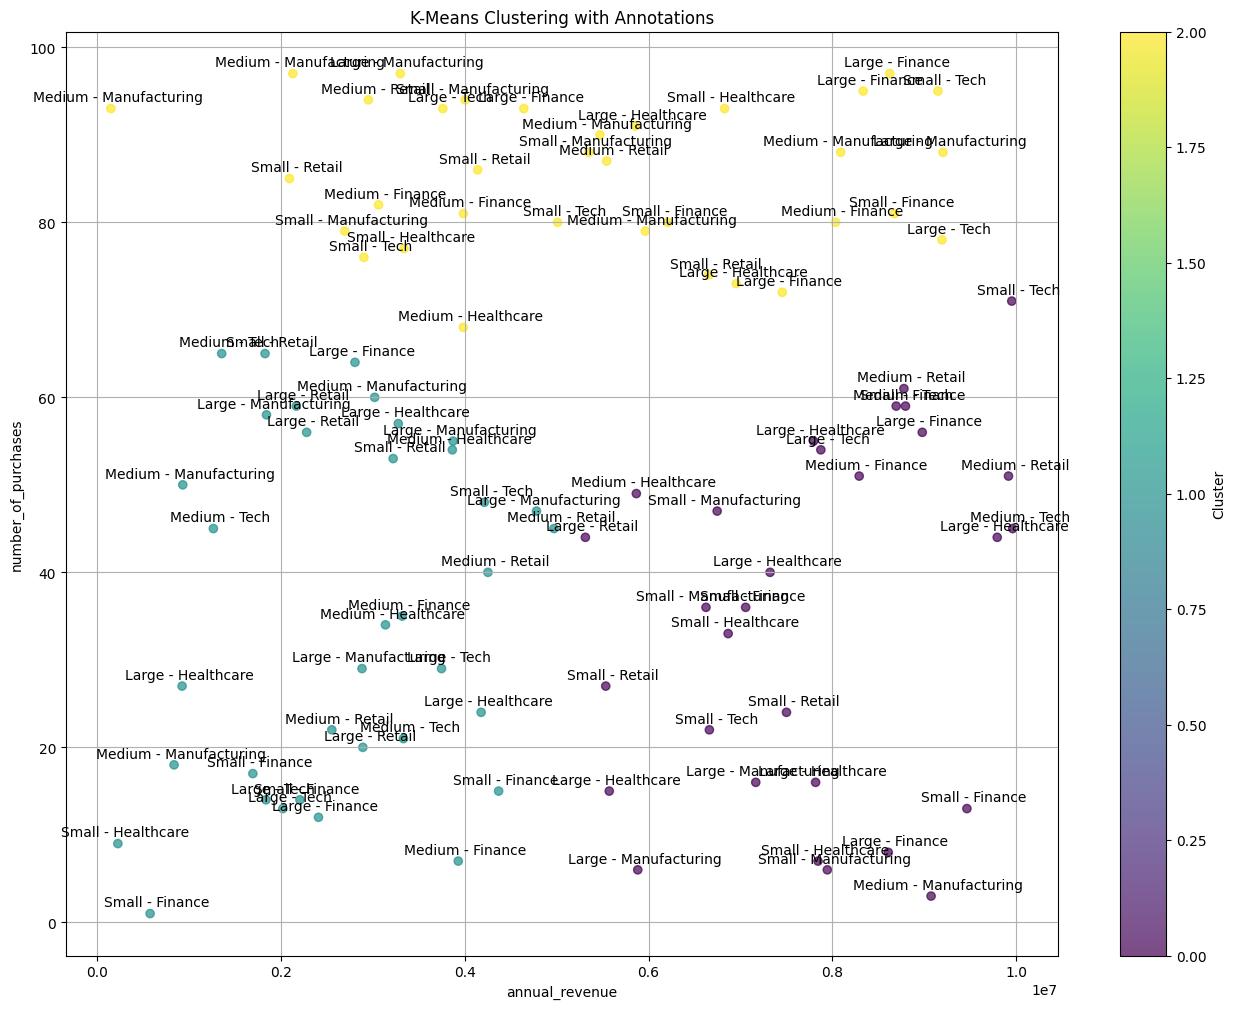

In [69]:

# That looks impressive, but we are missing a lot of useful information. Let's add annotations to the plot, so we can better-understand what's going on here.

to the plot so we caimport pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data (replace 'data' with your actual DataFrame)
data = data

# Data preprocessing (assuming numerical data for simplicity)
# Select relevant features
features = data[['annual_revenue', 'number_of_purchases']]  # Adjust based on your dataset

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters and random state as needed
kmeans.fit(scaled_features)

# Add cluster labels to the original data
data['cluster'] = kmeans.labels_

# Visualize the clusters (assuming 2D for simplicity)
plt.figure(figsize=(16, 12))  # Adjust figure size as needed

# Scatter plot with cluster coloring
plt.scatter(data['annual_revenue'], data['number_of_purchases'], c=data['cluster'], cmap='viridis', alpha=0.7)

# Annotate each point with company_size and industry
for index, row in data.iterrows():
    plt.annotate(f'{row["company_size"]} - {row["industry"]}',
                 (row['annual_revenue'], row['number_of_purchases']),
                 textcoords="offset points", xytext=(5,5), ha='center')

plt.xlabel('annual_revenue')
plt.ylabel('number_of_purchases')
plt.title('K-Means Clustering with Annotations')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


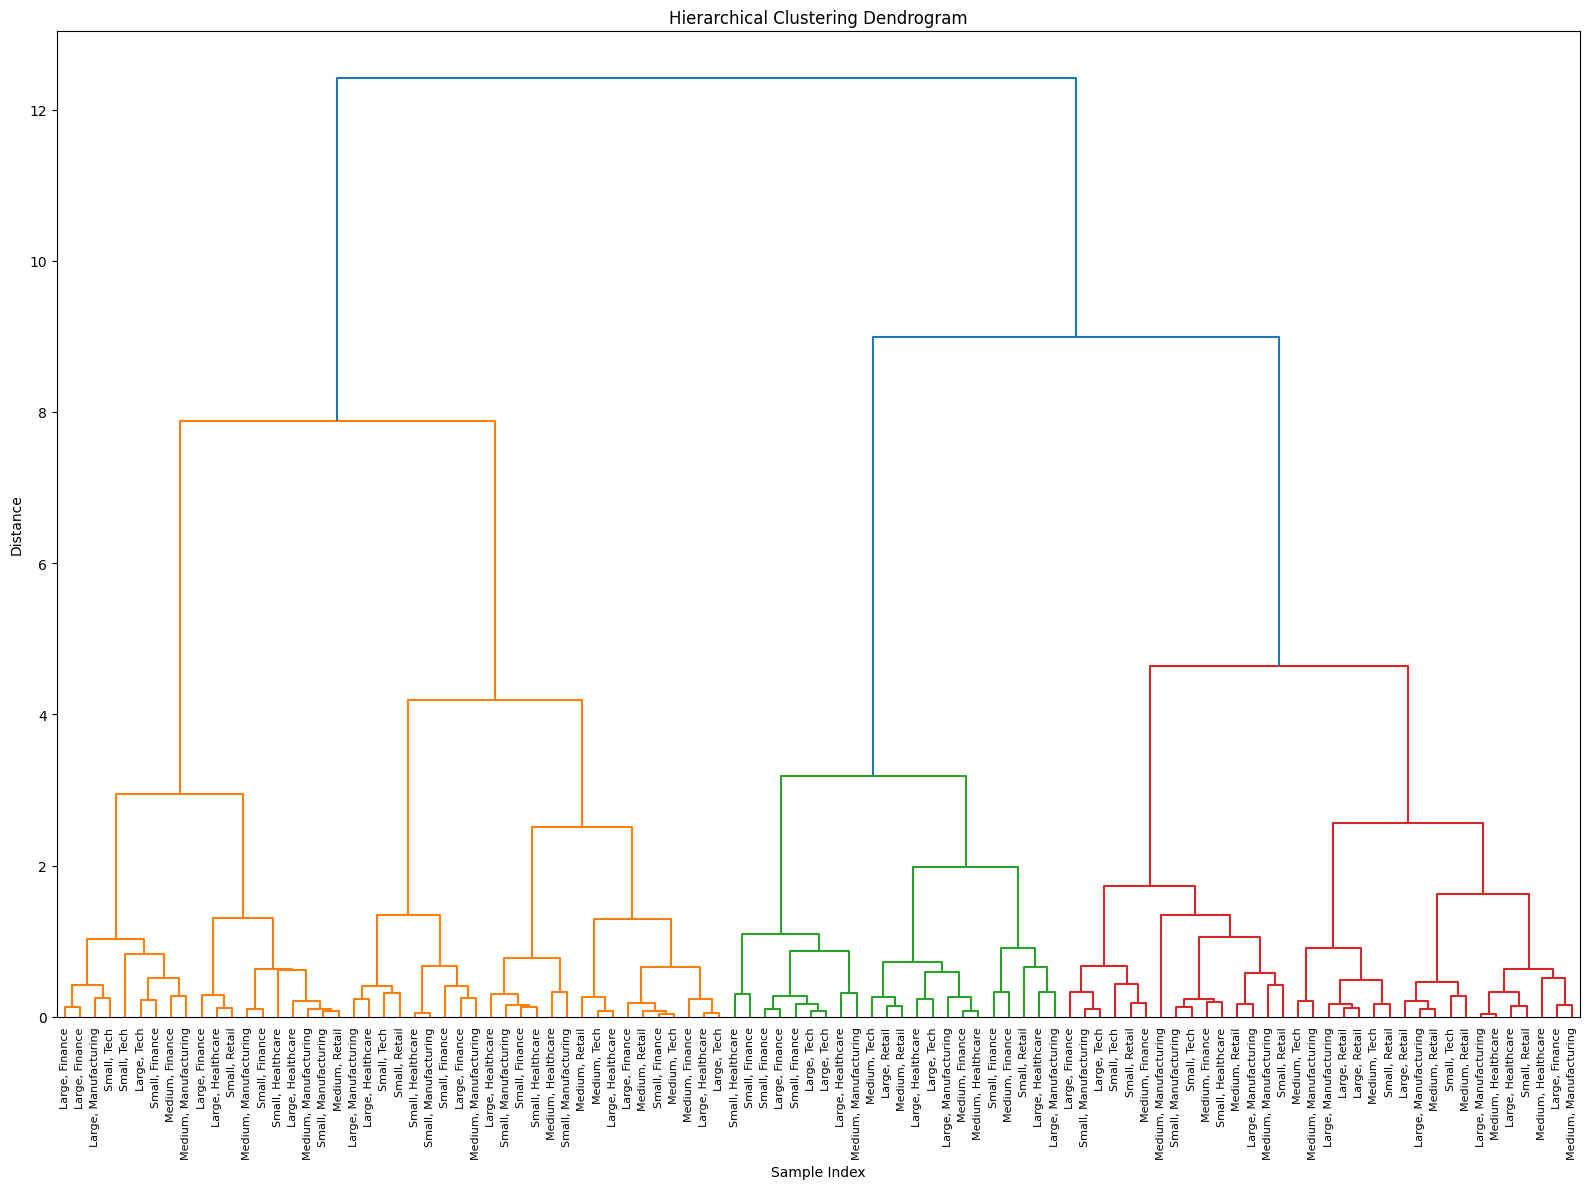

In [71]:

# Hierarchical Clustering

import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Load the data
data = data

# Data preprocessing
features = data[['annual_revenue', 'number_of_purchases']]

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Hierarchical Clustering
linked = linkage(scaled_features, method='ward')

# Create custom labels
labels = [f'{row["company_size"]}, {row["industry"]}' for _, row in data.iterrows()]

# Plot the dendrogram with rotated and smaller text labels
plt.figure(figsize=(16, 12))  # Increased figure size
dendrogram(linked, labels=labels, leaf_rotation=90, leaf_font_size=8)  # Rotated labels to 90 degrees for better spacing
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()  # Adjust layout to fit labels better
plt.show()

# Cut the dendrogram to create clusters
data['cluster'] = fcluster(linked, t=3, criterion='maxclust')


In [12]:

# After Hierarchial Clustering I ran three more experiments. I tested the following:
# DBSCAN useful for  arbitrarily shaped clusters, robust to outliers, and oes not require specifying the number of clusters beforehand.
# Gaussian Mixture Model (GMM): Good for datasets where clusters have different shapes and sizes.
# Agglomerative Clustering: Hierarchical clustering method that builds nested clusters and provides a dendrogram for visualization.
     
# All three produced the results that they were supposed to, but the take-away was so cofusing, it wasn't useful at all. Clustering algos always do exactly what you tell them to do, but they don't always  do things that are useful.


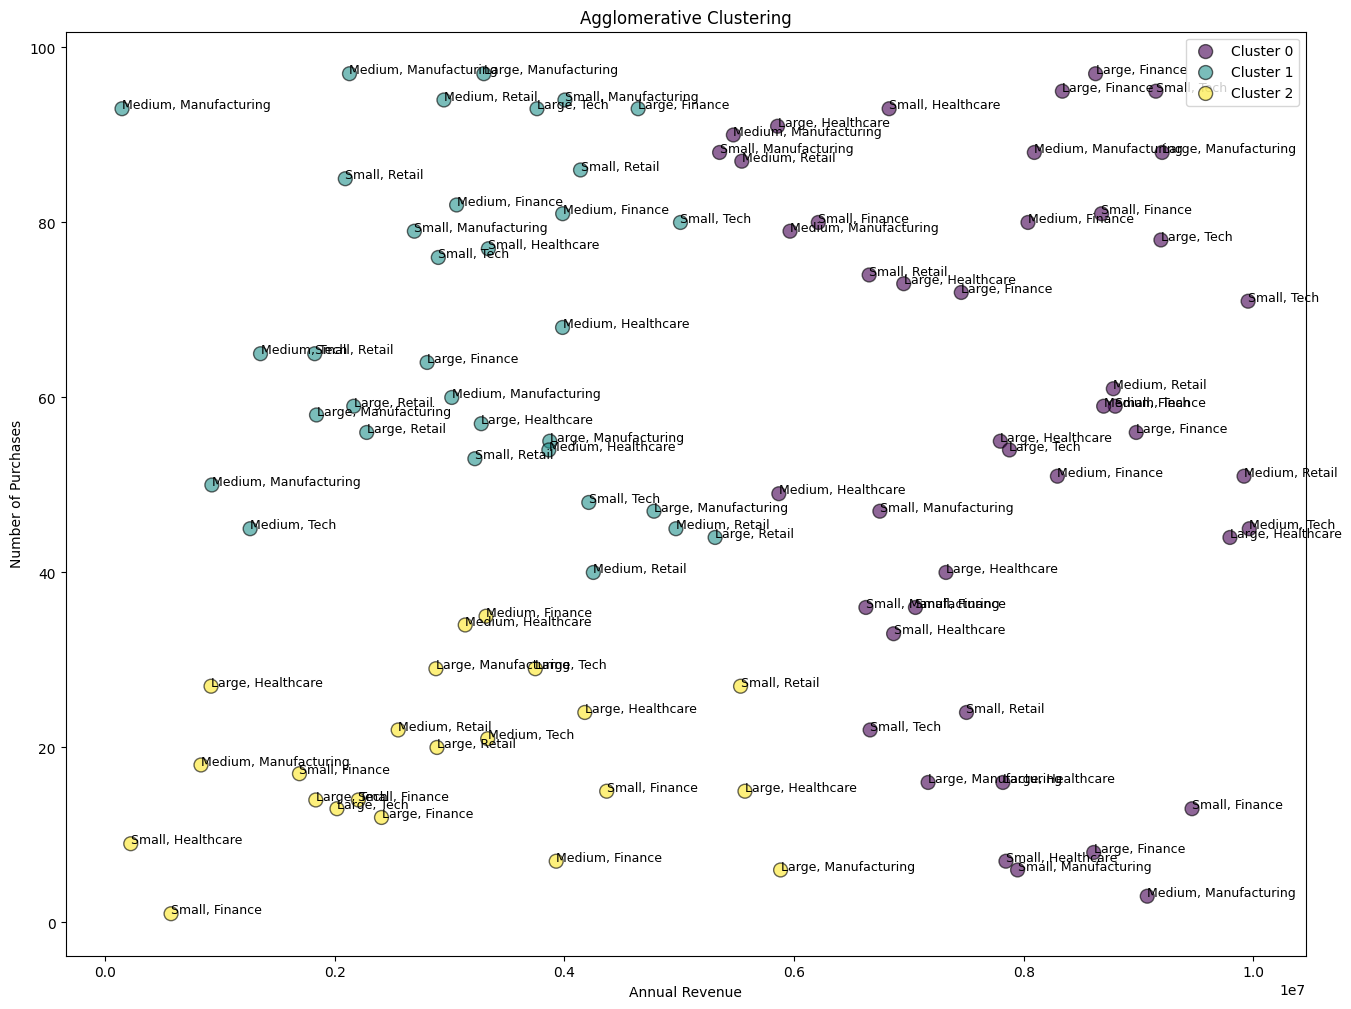

In [73]:

# For instance, here is the outcome of the Aggloromative Clustering experiment...

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = data

# Data preprocessing
features = data[['annual_revenue', 'number_of_purchases']]

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)  # Adjust the number of clusters as needed
data['cluster'] = agg_clustering.fit_predict(scaled_features)

# Create a color map for the clusters
colors = plt.cm.get_cmap('viridis', 3)
unique_clusters = np.unique(data['cluster'])

# Visualize the clusters with annotations
plt.figure(figsize=(16, 12))
for cluster in unique_clusters:
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['annual_revenue'], cluster_data['number_of_purchases'], 
                label=f'Cluster {cluster}',
                c=[colors(cluster)] * len(cluster_data), s=100, edgecolors='k', alpha=0.6)
    for i, row in cluster_data.iterrows():
        plt.text(row['annual_revenue'], row['number_of_purchases'], f'{row["company_size"]}, {row["industry"]}', fontsize=9)

plt.xlabel('Annual Revenue')
plt.ylabel('Number of Purchases')
plt.title('Agglomerative Clustering')
plt.legend()
plt.show()


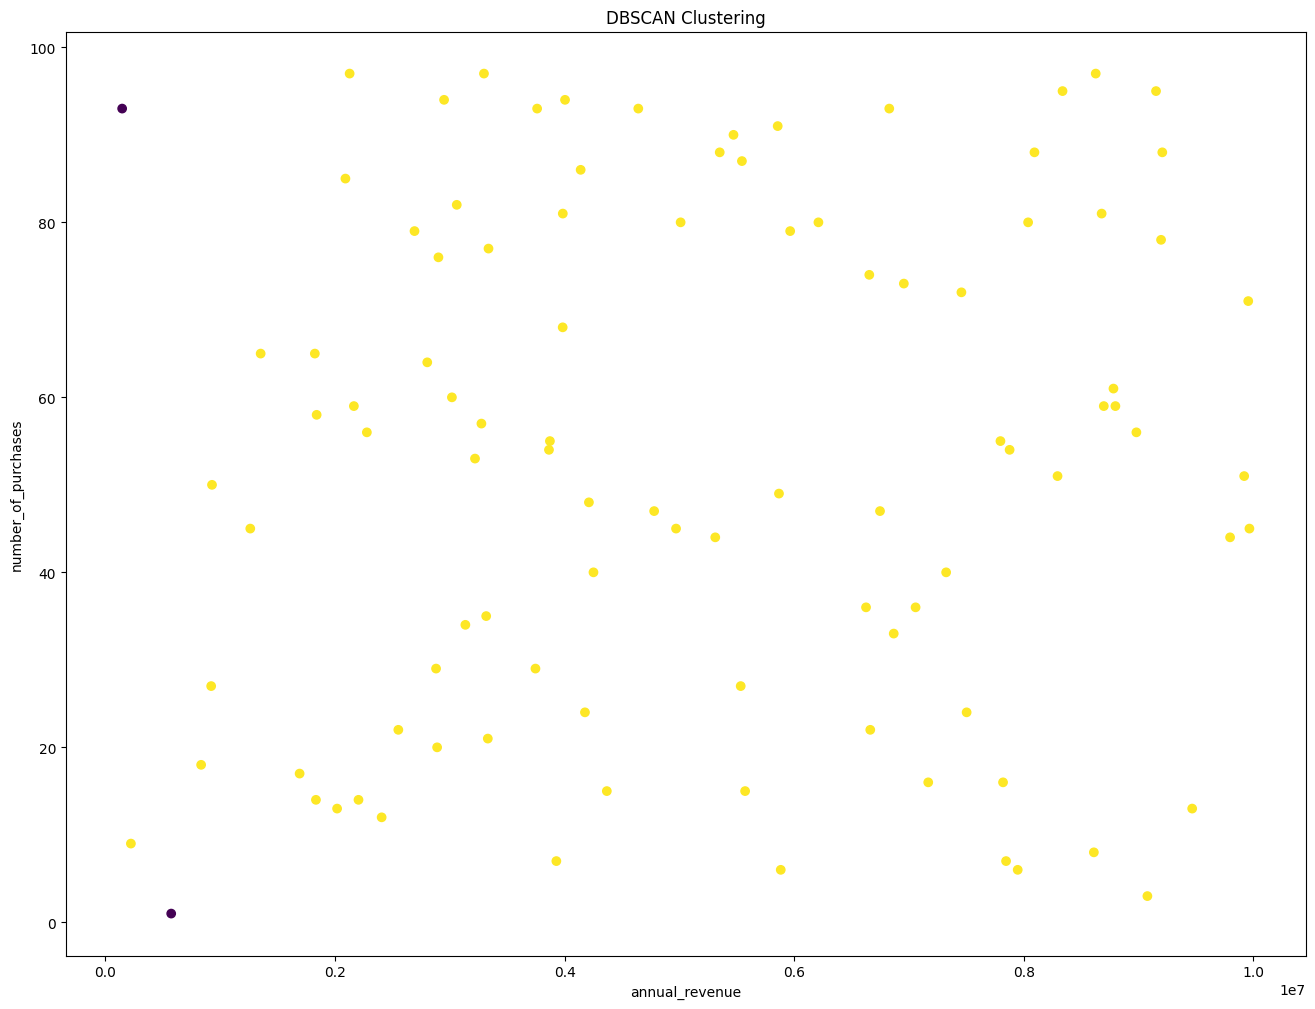

In [77]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load the data
data = data

# Data preprocessing (assuming numerical data for simplicity)
# Select relevant features
features = data[['annual_revenue', 'number_of_purchases']]  # Adjust based on your dataset

plt.figure(figsize=(16, 12))

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['dbscan_cluster'] = dbscan.fit_predict(scaled_features)

# Visualize the clusters (assuming 2D for simplicity)
plt.scatter(data['annual_revenue'], data['number_of_purchases'], c=data['dbscan_cluster'], cmap='viridis')
plt.xlabel('annual_revenue')
plt.ylabel('number_of_purchases')
plt.title('DBSCAN Clustering')    
plt.show()


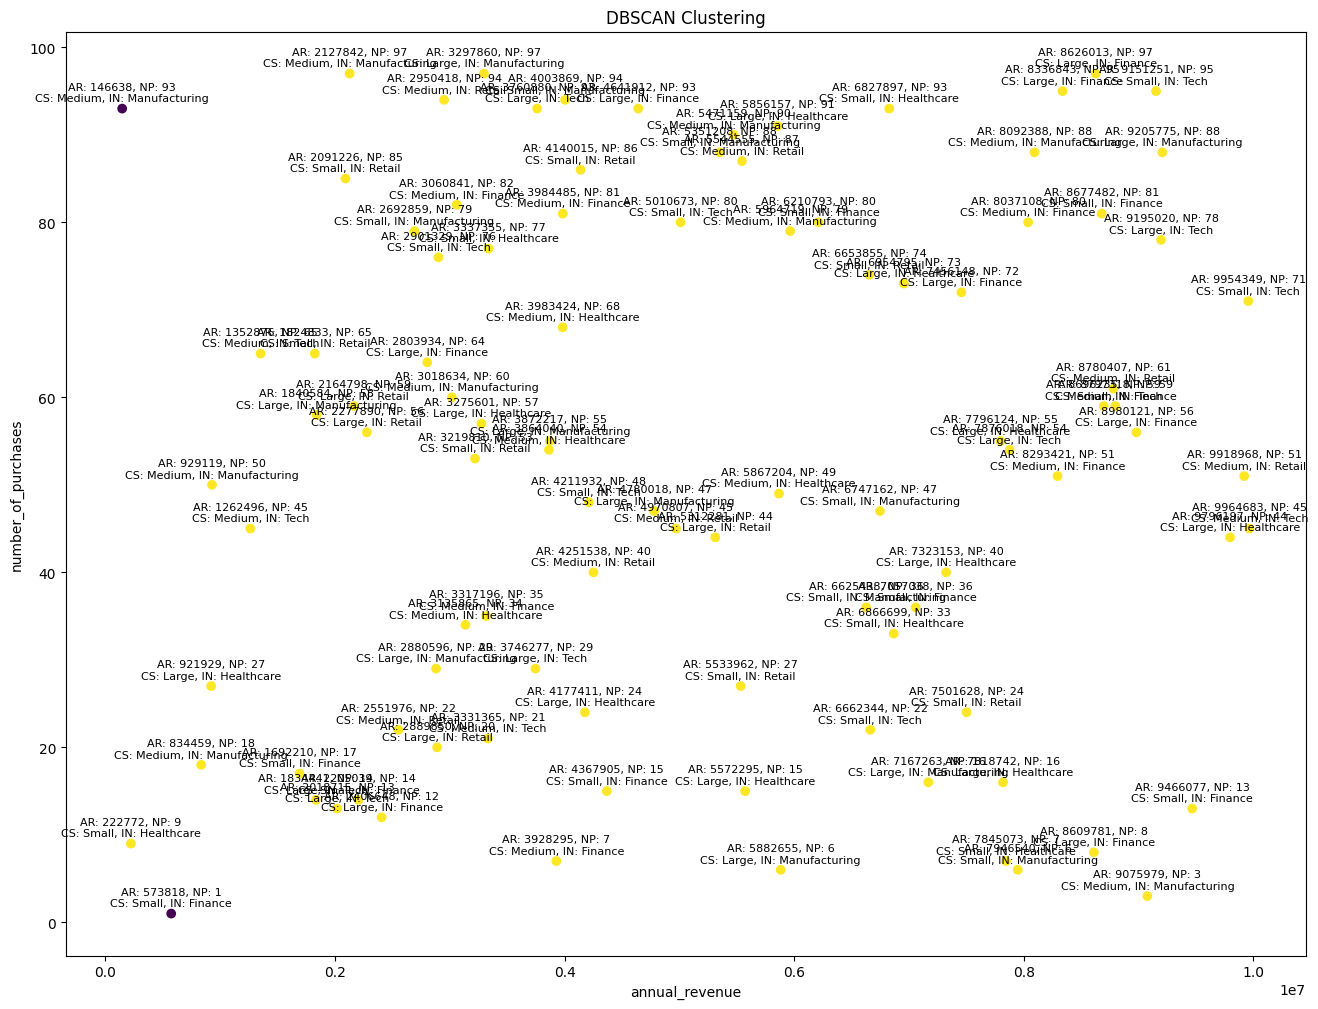

In [78]:

# Again, this looks very useful, because we have two datpoints that stick out from the rest of the population. We want to know why we have these
# outliers, we we want to know how to create values from these outliers. Let's doe this exercise again, and add in annotations, so we have more
# description about what is going on here.

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load the data
data = data

# Data preprocessing (assuming numerical data for simplicity)
# Select relevant features
features = data[['annual_revenue', 'number_of_purchases']]  # Adjust based on your dataset

plt.figure(figsize=(16, 12))

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['dbscan_cluster'] = dbscan.fit_predict(scaled_features)

# Visualize the clusters (assuming 2D for simplicity)
plt.scatter(data['annual_revenue'], data['number_of_purchases'], c=data['dbscan_cluster'], cmap='viridis')
plt.xlabel('annual_revenue')
plt.ylabel('number_of_purchases')
plt.title('DBSCAN Clustering')

# Annotate the plot with 'annual_revenue', 'number_of_purchases', 'company_size', and 'industry'
for i, row in data.iterrows():
    plt.annotate(f"AR: {row['annual_revenue']}, NP: {row['number_of_purchases']}\nCS: {row['company_size']}, IN: {row['industry']}", 
                 (row['annual_revenue'], row['number_of_purchases']),
                 textcoords="offset points",  # Position the text relative to the data point
                 xytext=(0,5),  # Distance from the data point (x,y)
                 ha='center', fontsize=8)  # Horizontal alignment
    
plt.show()


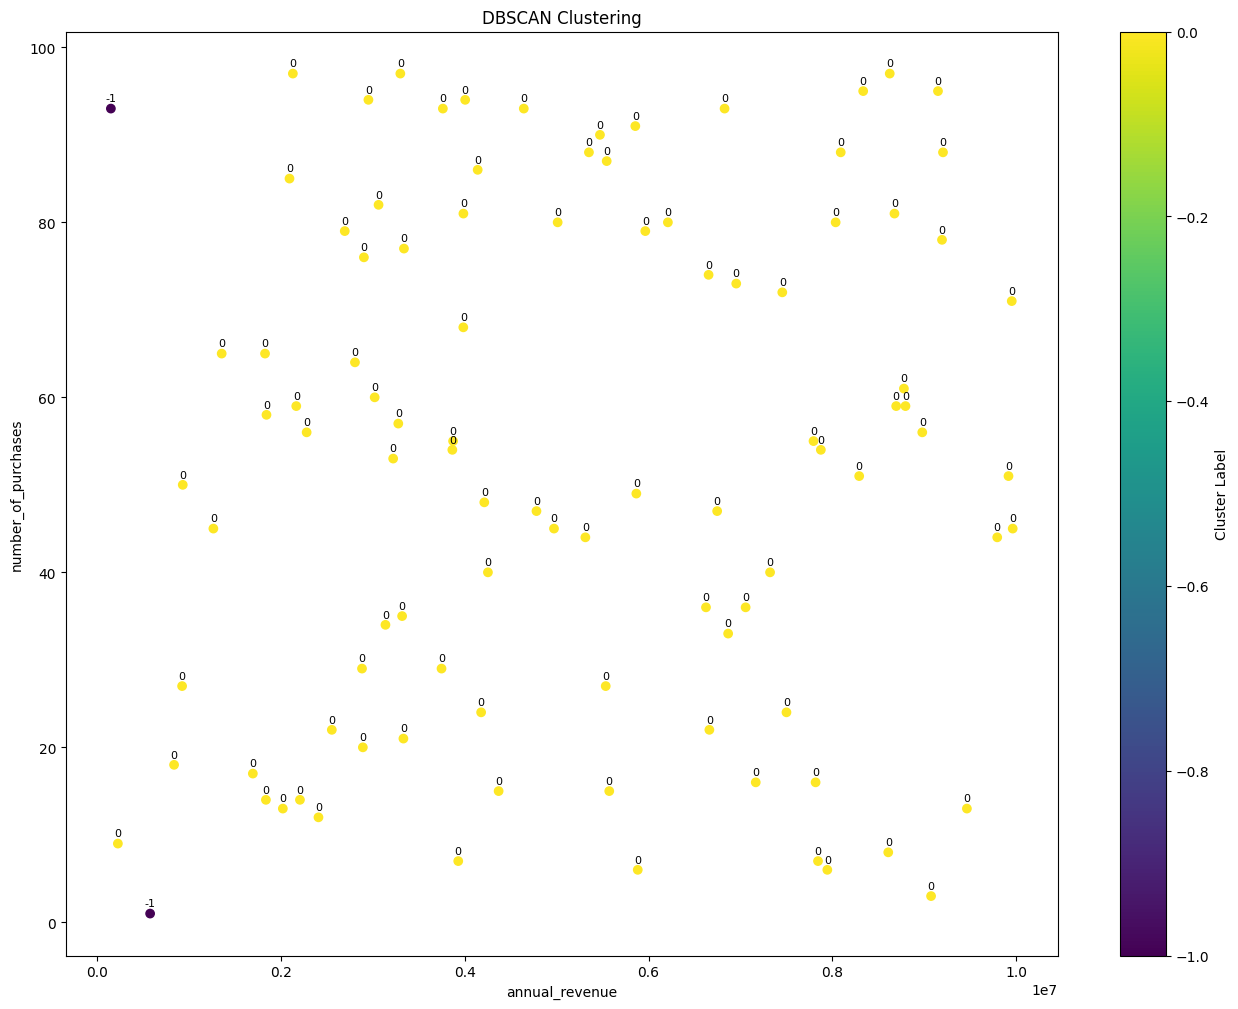

In [80]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load the data
data = data

# Data preprocessing (assuming numerical data for simplicity)
# Select relevant features
features = data[['annual_revenue', 'number_of_purchases']]  # Adjust based on your dataset

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['dbscan_cluster'] = dbscan.fit_predict(scaled_features)

plt.figure(figsize=(16, 12))

# Visualize the clusters (assuming 2D for simplicity)
scatter = plt.scatter(data['annual_revenue'], data['number_of_purchases'], c=data['dbscan_cluster'], cmap='viridis')
plt.xlabel('annual_revenue')
plt.ylabel('number_of_purchases')
plt.title('DBSCAN Clustering')

# Annotate the plot with cluster numbers
for i, row in data.iterrows():
    plt.annotate(f"{row['dbscan_cluster']}", 
                 (row['annual_revenue'], row['number_of_purchases']),
                 textcoords="offset points",  # Position the text relative to the data point
                 xytext=(0,5),  # Distance from the data point (x,y)
                 ha='center', fontsize=8)  # Horizontal alignment

# Add colorbar for clusters
plt.colorbar(scatter, label='Cluster Label')
    
plt.show()


In [81]:

# Print the results for more details...
for i, row in data.iterrows():
    print(f"Data Point {i}: Cluster={row['dbscan_cluster']}, Annual Revenue={row['annual_revenue']}, Number of Purchases={row['number_of_purchases']}")


Data Point 0: Cluster=0, Annual Revenue=4211932, Number of Purchases=48
Data Point 1: Cluster=0, Annual Revenue=1834441, Number of Purchases=14
Data Point 2: Cluster=0, Annual Revenue=1352876, Number of Purchases=65
Data Point 3: Cluster=0, Annual Revenue=8037108, Number of Purchases=80
Data Point 4: Cluster=0, Annual Revenue=3060841, Number of Purchases=82
Data Point 5: Cluster=0, Annual Revenue=7845073, Number of Purchases=7
Data Point 6: Cluster=0, Annual Revenue=2692859, Number of Purchases=79
Data Point 7: Cluster=0, Annual Revenue=8092388, Number of Purchases=88
Data Point 8: Cluster=0, Annual Revenue=5867204, Number of Purchases=49
Data Point 9: Cluster=0, Annual Revenue=7796124, Number of Purchases=55
Data Point 10: Cluster=0, Annual Revenue=2018715, Number of Purchases=13
Data Point 11: Cluster=0, Annual Revenue=6954795, Number of Purchases=73
Data Point 12: Cluster=0, Annual Revenue=8980121, Number of Purchases=56
Data Point 13: Cluster=0, Annual Revenue=2277890, Number of Pu

In [ ]:

# We did a lot already, but here is some additional analysis:
    
# 1) Further types of Analysis to Gain More Insight:

# Predictive Modeling: Build predictive models to forecast customer behavior or predict outcomes such as average_purchase_value 
# or likelihood of being a high_value_client. Techniques like regression (for continuous outcomes) or classification (for 
# binary outcomes) could be employed.

# Customer Lifetime Value (CLV) Analysis: Estimate the future value of customers based on historical data such as 
# number_of_purchases, average_purchase_value, and last_purchase_days_ago. This analysis helps prioritize customer acquisition 
# and retention efforts.

# Churn Analysis: Identify factors (years_with_company, last_purchase_days_ago) that correlate with customer churn 
# (loss of customers). Predictive models can help anticipate which customers are likely to churn, enabling proactive retention strategies.


# 2) Analysis to Reduce Expenses:

# Cost-to-Serve Analysis: Analyze the cost associated with serving different customer segments (company_size, industry). 
# This includes operational costs related to customer support, marketing, and service delivery. Identifying high-cost segments 
# can guide resource allocation and cost reduction strategies.

# Efficiency Improvement: Use data to optimize processes and workflows (years_with_company, number_of_purchases). This might 
# involve reducing the average time between purchases or improving customer service efficiency to lower operational expenses.


# 3) Analysis to Boost Revenues:

# Upselling and Cross-selling: Identify opportunities (annual_revenue, number_of_purchases, industry) to upsell or cross-sell 
# additional products or services to existing customers. Use predictive modeling to suggest relevant offerings based on customer 
# behavior and preferences.

# Customer Retention Strategies: Develop strategies (last_purchase_days_ago, is_high_value_client) to retain high-value customers 
# and increase their lifetime value. This could involve personalized loyalty programs or targeted promotions.

# Market Basket Analysis: Identify product combinations (number_of_purchases, average_purchase_value) frequently purchased together. 
# This analysis can help optimize product bundling strategies to increase overall purchase value.


In [ ]:

# END!!! 
